# Part 1. PyTorch introductory assignments

PyTorch exercises for those who want to remember the basics of framefork.

In [ ]:
# main framework
import torch
# additional functions on tensors or networks
from torch.nn import functional as F

# work with arrays in pure python
import numpy as np

## 1.1 Tensors creation
Tensors is a data structure optimized for automatic differentiation. In most cases, working with them is similar to working with arrays in numpy.

We use `torch.tensor()` to create tensor object from pure Python and Numpy objects.

### 1. From list

In [ ]:
from torch._C import dtype
data_lst = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tensor_from_lst = torch.tensor(data_lst, dtype=torch.int64)

In [ ]:
assert(tensor_from_lst.dtype == torch.int64)
assert(tensor_from_lst.shape == torch.Size([3, 3]))

### 2. From Numpy array



In [ ]:
data_ndarray = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
tensor_from_numpy = torch.tensor(data_ndarray)

In [ ]:
assert(tensor_from_numpy.dtype == torch.int64)
assert(tensor_from_numpy.shape == torch.Size([3, 3]))

You can also try to use `torch.from_numpy()` on the following array to understand the differences between this function and `torch.tensor()`

In [ ]:
data_ndarray2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
tensor_using_from_numpy = torch.from_numpy(data_ndarray2)

In [ ]:
tensor_from_numpy *= 0
tensor_using_from_numpy *= 0

In [ ]:
assert(all(data_ndarray[0] == [1, 2, 3]))
assert(all(data_ndarray2[0] == [0, 0, 0]))

### 3. Using default values

In [ ]:
data_shape = (2, 3, 4)

# Creating a tensor of a given shape filled with zeros
tensor_zeros = torch.zeros(data_shape)
print('Zero:\n{}'.format(tensor_zeros))

Zero:
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [ ]:
# Create tensor of a given shape filled with ones
tensor_ones = torch.ones(data_shape)


# Create tensor of a given shape filled with random numbers
tensor_rand = torch.rand(data_shape)

In [ ]:
assert(all(tensor_ones[0][0] == torch.tensor([1., 1., 1., 1.])))
assert(tensor_ones.shape == torch.Size(data_shape))
assert(tensor_rand.shape == torch.Size(data_shape))

You can also create tensor from sequence using `torch.arange()` and then use `tensor.reshape()` function to convert data into the desired shape.

In [ ]:
range_len = 24
# Create tensor filled with sequential values from 0 to range_len
''' YOUR CODE HERE '''
tensor_seq = torch.arange(range_len)

# Convert the shape of the created tensor to fit data_shape
''' YOUR CODE HERE '''
tensor_seq_reshaped = torch.reshape(tensor_seq, data_shape)

In [ ]:
assert(tensor_seq[0] == torch.tensor(0))
assert(tensor_seq[-1] == torch.tensor(range_len - 1))
assert(tensor_seq.shape ==torch.Size([range_len]))

In [ ]:
assert(tensor_seq_reshaped[0][0][0] == torch.tensor(0))
assert(tensor_seq_reshaped[-1][-1][-1] == torch.tensor(range_len - 1))
assert(tensor_seq_reshaped.shape == torch.Size(data_shape))

If you want to make a tensor with a shape of another tensor, but with default values, you can use `torch.values_like()` functions

In [ ]:
tensor = torch.rand((1, 2, 2))

# For example, you want to create a mask for the image or something filled with zeros
tensor_mask = torch.zeros_like(tensor)
print('Image:\n{}'.format(tensor))
print('Image_mask:\n{}'.format(tensor_mask))

Image:
tensor([[[0.2572, 0.2069],
         [0.5841, 0.1806]]])
Image_mask:
tensor([[[0., 0.],
         [0., 0.]]])


Using similar functions, create a tensor mask filled with ones and a mask filled with the random values

In [ ]:
# Mask, filled with ones (with a shape of tensor)
tensor_mask_ones = torch.ones_like(tensor)

# Mask, filled with random values (with a shape of tensor)
tensor_mask_rand = torch.rand_like(tensor_mask_ones)

In [ ]:
assert(tensor_mask_ones[0][0][0] == torch.tensor(1.))
assert(tensor_mask_ones.shape == tensor.shape)
assert(tensor_mask_rand.shape == tensor.shape)

## 1.2 Devices

Tensors can be stored in general memory, GPU memory, TPU memory.

In [ ]:
tensor = torch.rand((2, 5, 5))
print(tensor.device)

cpu


For the further assignments you should use Google Colab with GPU (Runtime -> Change Runtime Type -> Hardware Accelerating) and store tensors in GPU memory.

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [ ]:
# Move tensor to the GPU memory
tensor = tensor.to(device)

In [ ]:
assert(tensor.device.type == 'cuda')

## 1.3 Autograd

Auto differentiation is a core of ML frameworks. PyTorch can figure out the computation of gradients for a set of operations. Almost all pytorch operations are differentiable.

`required_grad=True` make PyTorch to store gradients for this particular tensor. Usually, for input values this parameters is set to False - we don't want to change our real data.

In [ ]:
# tensor = torch.rand((2, 4, 4), requires_grad=True)
tensor = torch.ones((2, 4, 4))
tensor.requires_grad = True

In [ ]:
# define function y
y = 5 * tensor ** 3 - 3
print(y)

tensor([[[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]], grad_fn=<SubBackward0>)


In [ ]:
print(tensor.grad)

None


There is no gradient for our tensor, because we have to call `.backward() ` method of variable $y$. This method will calculate gradien of $y$ over variable tensor

NOTE: gradient can be calculated only for a scalar. The output of $y$ is a tensor, we can calculate mean(), sum(), etc

In [ ]:
# Call the backward method and calculate gradient for the sum of the y variable
y.sum().backward()
tensor.grad

tensor([[[15., 15., 15., 15.],
         [15., 15., 15., 15.],
         [15., 15., 15., 15.],
         [15., 15., 15., 15.]],

        [[15., 15., 15., 15.],
         [15., 15., 15., 15.],
         [15., 15., 15., 15.],
         [15., 15., 15., 15.]]])

In [ ]:
assert(tensor.grad.shape == torch.Size([2, 4, 4]))
assert(tensor.grad[0][0][0] == torch.tensor(15))

**NOTE:** 
* you can not run `.backward()` again without calculating y value again;
* if you run y function one more time the gradient values for tensor variable will be summed.

In [ ]:
# Call the backward method again and calculate gradient for the sum of the y variable
y = 5 * tensor ** 3 - 3
y.sum().backward()
tensor.grad

tensor([[[30., 30., 30., 30.],
         [30., 30., 30., 30.],
         [30., 30., 30., 30.],
         [30., 30., 30., 30.]],

        [[30., 30., 30., 30.],
         [30., 30., 30., 30.],
         [30., 30., 30., 30.],
         [30., 30., 30., 30.]]])

In [ ]:
assert(tensor.grad.shape == torch.Size([2, 4, 4]))
assert(tensor.grad[0][0][0] == torch.tensor(30))

## 1.4 Neural network in PyTorch

NN in PyTorch defines as a set of different layers. Each layer is a specific function:


*   Linear layer, convolutional layer, etc
*   Activation function
*   Tensors operations

The first type has parameters called weights and biases.The process of NN training is to change weights of NN layers so the prediction of network will match the real object.


## Linear layer

[torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) takes a matrix $(N, *, H_{in})$ and produce a matrix $(N, *, H_{out})$, where

$*$ means any number of additional dimensions, $H_{in}$ - input features, $H_{out}$ - output features

Linear layer is a $W \cdot x + b$ operation, where $W$ - weights of the layer and $b$ - bias. Bias can be ommited with `bias=False`

In [ ]:
input_tensor = torch.ones((3, 5))
print('input shape: ', input_tensor.shape)

input shape:  torch.Size([3, 5])


We fed sample of data with batch_size=3 and features of each sample=5. 

All samples in a batch processed separately. This is true for all layers and functions of PyTorch.

In [ ]:
# Create a linear layer for given data with the number of out_features=100 and ommited bias (don't forget about GPU)
layer = torch.nn.Linear(5, 100, bias=False).to("cuda")

Let's take a look at layers parameters. 

`layer.paramaters()` outputs a generator of all weights and biases of this object.

In [ ]:
print(type(layer.parameters()))
# iterate over layer parameters and print shapes
for i in layer.parameters():
    print(i.shape)

<class 'generator'>
torch.Size([100, 5])


You should receive the following output:

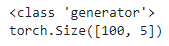

Single layer contains only one weight matrix of shape (H_out, H_in). You can access the weights of a layer directly, using `layer.weight` method

In [ ]:
print(layer.weight.shape)

torch.Size([100, 5])


You can move layer from CPU to GPU in the same way as tensor.

In [ ]:
layer.to('cpu') # or layer.cpu() for simplicity

Linear(in_features=5, out_features=100, bias=False)

In [ ]:
layer.to('cuda:0')

Linear(in_features=5, out_features=100, bias=False)

### Neural Network

You can write a NN as a set of layers and then apply them sequentially

In [ ]:
from torch.nn.modules.container import Sequential
input_tensor = torch.rand((3, 5))

# Create three sequential linear layers for the given input tensor. First two with the output 100 and the last one with the output 3.
# Apply them sequentially and store in the output
three_seq = Sequential(
    torch.nn.Linear(5, 100, bias=False),
    torch.nn.Linear(100, 100, bias=False),
    torch.nn.Linear(100, 3, bias=False)
)

# approx 3 lines of code here

output = three_seq(input_tensor)

In [ ]:
assert(output.shape == torch.Size([3, 3]))

### Activation and loss functions

You can use different activation functions from `torch.nn` and combine them sequentially with the NN layers

In [ ]:
# Example of the activation function
torch.nn.ReLU6()

ReLU6()

You can use different loss functions from `torch.nn`

In [ ]:
# Example of the loss fun
loss_function = torch.nn.CrossEntropyLoss()

# Part 2. Feedforward Neural Network construction assignment 

Import all the necessary libraries

In [2]:
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np

import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

SEED = 0

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

device = ('cuda' if torch.cuda.is_available() else 'cpu')

To use the `plot_decision_regions` we should additionally install the `mlxtend` package

In [3]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Uploading dataset

Let's upload the wine dataset from sklearn

In [4]:
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

Create class for the dataset. Inherit a class from Dataset

In [5]:
# Fill the WineDataset class fields

class WineDataset():

    def __init__(self, X, y):
        self.X = torch.from_numpy(X).to(device)
        self.y = torch.from_numpy(y).to(device)
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

ds = WineDataset(wine.data, wine.target)
for x, y in ds:
  print(x, y)
  break

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03], device='cuda:0', dtype=torch.float64) tensor(0, device='cuda:0')


Create train and test splits using `train_test_split` function with the following parameters:

* size of test - 30%
* using shuffle
* using SEED constant for the random state

Remember that use should use WineDataset class.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                    wine.target,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=SEED)

train_dataset = WineDataset(X_train, y_train)
test_dataset = WineDataset(X_test, y_test)

In [7]:
assert(len(train_dataset) == 124)
assert(len(test_dataset) == 54)

## Creating Feedforward network

Create the FNN with the following attributes:
* 3 linear layers
* activation functions on your choice (the most suitable for this kind of task)

In [8]:
from torch.nn import functional as F

INPUT_SIZE = wine.data.shape[1]
OUTPUT_SIZE = max(wine.target) + 1


class WineNet(nn.Module):

    def __init__(self, n_in=INPUT_SIZE, n_hidden_neurons=100, n_out=OUTPUT_SIZE):

        super().__init__()

        self.three_lin_layers_seq = nn.Sequential(
            nn.Linear(n_in, n_hidden_neurons, bias=True),
            nn.LeakyReLU(),
            nn.Linear(n_hidden_neurons, n_hidden_neurons, bias=True),
            nn.LeakyReLU(),
            nn.Linear(n_hidden_neurons, n_out, bias=True),
        )

        
    def forward(self, x):

        x = self.three_lin_layers_seq(x)
        x = F.log_softmax(x, -1)
        return x


    # для использования в функции plot_decision_regions
    def predict(self, x):

        ''' PLEASE DO NOT CHANGE THE CODE OF THIS FUNCTION '''
        x = torch.tensor(x, dtype=torch.float32).to(device)

        with torch.no_grad():
            x = self.forward(x)

        x = x.cpu().argmax(dim=-1)
        x = x.data.numpy()
        
        return x

In [9]:

# you can change parameters here

model = WineNet(n_hidden_neurons = 100) 
model = model.to(device)

for x, y in train_dataset:
  print(model(x.float()))
  break

tensor([-36.7317, -30.7401,   0.0000], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)


## Training FNN

In [10]:
# Initialize the loss function and initialize and tune the optimizer and scheduler

loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.KLDivLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
#scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)

Write the code for the model training process.

NOTE: You can memorize the best metric value and weight in the colab with the commands 

`torch.save(model.state_dict(), STATE_DICT_PATH)`, and `load model.load_state_dict(torch.load(STATE_DICT_PATH))`

In [11]:
import warnings
warnings.filterwarnings("ignore")

model = WineNet(n_hidden_neurons = 100) 
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

BATCH_SIZE = 200
EPOCHS_NUM = 5000

''' PLEASE DO NOT CHANGE THE CODE OF THESE LINES '''
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)

metric_fn = lambda true, pred: metrics.f1_score(true, pred, average='macro')
best_metric_value = 0.87
STATE_DICT_PATH = 'best_model_state_dict.pt'

for epoch in tqdm(range(EPOCHS_NUM)):

    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        loss = loss_fn(model(x.float()), y)
        loss.backward()
        optimizer.step()

    if scheduler:
      scheduler.step(loss)
        
    if (epoch * 10) % EPOCHS_NUM == 0:
        model.eval()
        test_preds, true = [], []

        with torch.no_grad():
            for x, y in test_loader:
                preds = model(x.float())
                test_preds.append(preds)
                true.append(y)
        
        test_preds = torch.cat(test_preds).squeeze()
        true = torch.cat(true).squeeze()
        test_loss = loss_fn(test_preds, true).item()
        test_metric = metric_fn(true.to("cpu"),
                                test_preds.argmax(dim=-1).to("cpu"))
        
        print(f'Epoch: {epoch}\t\tTest loss: {test_loss:0.4f}\t\tTest metric: {test_metric:0.4f}')

        if (test_metric >= 0.87) and (test_metric > best_metric_value):
            torch.save(model.state_dict(), STATE_DICT_PATH)
            best_metric_value = test_metric
            print("New score achieved. Model state dict was updated.\n")


  0%|          | 0/5000 [00:00<?, ?it/s]

Epoch: 0		Test loss: 32.2907		Test metric: 0.1735
Epoch: 500		Test loss: 0.1583		Test metric: 0.9469
New score achieved. Model state dict was updated.

Epoch: 1000		Test loss: 0.1552		Test metric: 0.9303
Epoch: 1500		Test loss: 0.1226		Test metric: 0.9469
Epoch: 2000		Test loss: 0.1154		Test metric: 0.9469
Epoch: 2500		Test loss: 0.1167		Test metric: 0.9469
Epoch: 3000		Test loss: 0.1295		Test metric: 0.9469
Epoch: 3500		Test loss: 0.1417		Test metric: 0.9469
Epoch: 4000		Test loss: 0.1545		Test metric: 0.9469
Epoch: 4500		Test loss: 0.1637		Test metric: 0.9469


In [12]:
metrics.f1_score(true.to("cpu"), 
                 test_preds.argmax(dim=-1).to("cpu"),
                 average='macro')

0.9468546473850431

Example of the nice data plot :)

In [ ]:
# display decision region for all elements
import matplotlib.pyplot as plt

value=1.5
width=0.75

model.eval()
plt.rcParams['figure.figsize'] = (130, 130)

X = wine.data #[:, :2] # fix here if needed
y = wine.target

fig, axs = plt.subplots(13, 13)

for i in range(13):
  for j in range(13):
    features = [i, j]
    #plt.subplot(i + 1, j + 1)
    plot_decision_regions(X, y, clf=model, 
                          feature_index = features,
                          filler_feature_values = {i : value for i in range(13) if i not in features},
                          filler_feature_ranges = {i : width for i in range(13) if i not in features},
                          legend = 2, ax = axs[i, j])

#Why this does not work? Why none of them are informative?

### Model evaluation

You should create a model with the F1-score greater than 0.87

In [13]:
model.eval()
test_preds = []
true = []

with torch.no_grad():
    for x, y in test_loader:
        x = x.to(device)
        preds = model.forward(x.float()).cpu()
        test_preds.append(preds)
        true.append(y)
test_preds = torch.cat(test_preds).squeeze()
true = torch.cat(true).squeeze()
test_metric = metrics.f1_score(true.to("cpu"), 
                               test_preds.argmax(dim=-1).to("cpu"),
                               average='macro')

print('F1-score on test:', test_metric)
assert test_metric >= 0.87, "You need to get f1_score greater or equal to 0.87"

F1-score on test: 0.9468546473850431
